In [1]:
%load_ext autoreload
%autoreload 2
import os

os.chdir('/home/yw699/codes/VAR-Watermark')  

import os.path as osp
import torch, torchvision
import random
import numpy as np
import PIL.Image as PImage, PIL.ImageDraw as PImageDraw
import torch
import torch.nn
import torch.nn as nn
import argparse
import numpy as np
from options import HiDDenConfiguration

import utils
from model.hidden import *
from noise_layers.noiser import Noiser
from PIL import Image
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms

from test_tool.utils import *

device = "cuda:8"



In [2]:
from VAR_model.var_use import VarTool
var = VarTool(device = device)

/home/yw699/anaconda3/envs/test/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



[constructor]  ==== flash_if_available=True (0/24), fused_if_available=True (fusing_add_ln=0/24, fusing_mlp=0/24) ==== 
    [VAR config ] embed_dim=1536, num_heads=24, depth=24, mlp_ratio=4.0
    [drop ratios ] drop_rate=0.0, attn_drop_rate=0.0, drop_path_rate=0.1 (tensor([0.0000, 0.0043, 0.0087, 0.0130, 0.0174, 0.0217, 0.0261, 0.0304, 0.0348,
        0.0391, 0.0435, 0.0478, 0.0522, 0.0565, 0.0609, 0.0652, 0.0696, 0.0739,
        0.0783, 0.0826, 0.0870, 0.0913, 0.0957, 0.1000]))

[init_weights] VAR with init_std=0.0147314


/home/yw699/codes/VAR-Watermark/VAR_model/var_use.py:50: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vae.load_state_dict(torch.load(vae_ckpt, map_location='cpu'), strict=T

Models loaded and prepared.


In [7]:
base_path = "/home/yw699/codes/VAR-Watermark/runs/all_vit 2025.02.16--13-16-55"

In [4]:

# fhat = load_fhat("/home/yw699/codes/VAR-Watermark/runs/d 2025.02.14--15-09-55/images/epoch-watermark-300.pt",8,device)
# image = var.var_decoder(fhat)
# save(image,"0.png")

# fhat = load_fhat("/home/yw699/codes/VAR-Watermark/runs/d 2025.02.14--15-09-55/images/epoch-original-300.pt",8,device)
# image = var.var_decoder(fhat)
# save(image,"1.png")


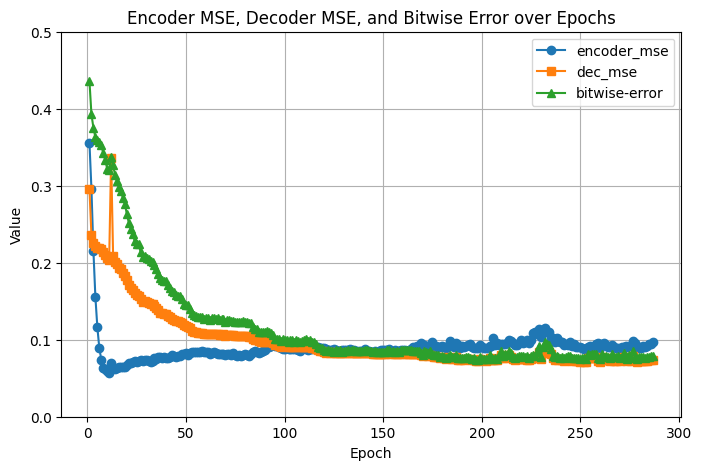

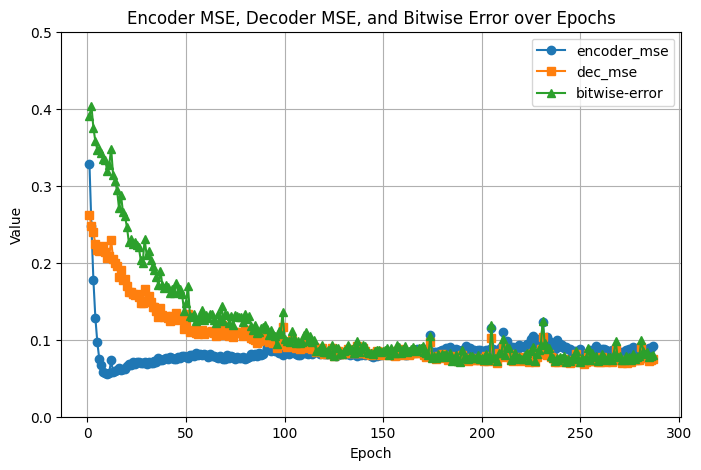

Original Tensor Shape: torch.Size([5, 32, 16, 16])
Original Tensor Shape: torch.Size([5, 32, 16, 16])


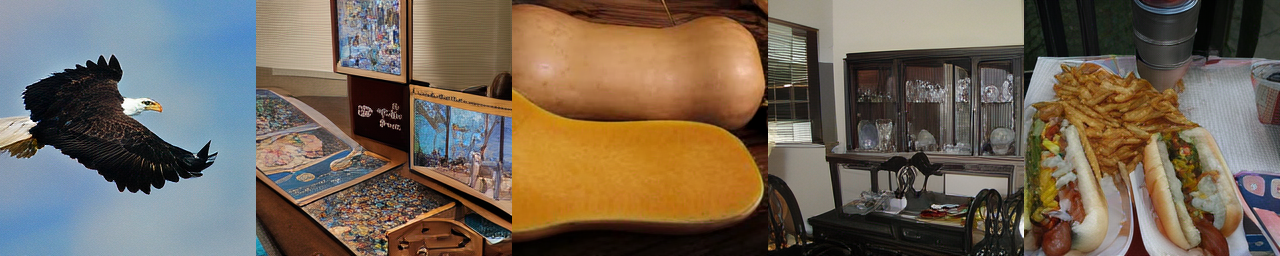

Image(torch.Size([5, 3, 256, 256])) saved to original_picture.png
torch.load() failed or shape mismatch: Loaded tensor has an unexpected shape., using load_fhat() instead.
Original Tensor Shape: torch.Size([5, 32, 16, 16])
Original Tensor Shape: torch.Size([5, 32, 16, 16])


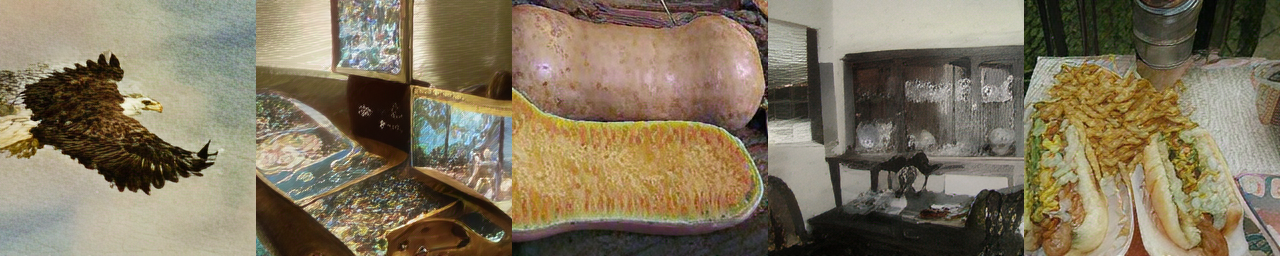

Image(torch.Size([5, 3, 256, 256])) saved to tes.png


In [9]:
test_one_method(var,base_path,device,270,y1=0,y2=0.5)

In [ ]:
batch_size = 8
message_length = 30
class_labels= [1,4,5,6,7,7,8,1]

options_file_path = "/home/yw699/codes/VAR-Watermark/runs/var_ed_v3 2025.02.14--20-25-13/options-and-config.pickle"
checkpoint_file_path = "/home/yw699/codes/VAR-Watermark/runs/var_ed_v3 2025.02.14--20-25-13/checkpoints/var_ed_v3--epoch-370.pyt"

message = torch.Tensor(np.random.choice([0, 1], (batch_size,message_length))).to(device)

images = var.generate_form_labels(class_labels)

encoder,decoder = load_hidden(options_file_path,checkpoint_file_path,device)

In [ ]:
images